<a href="https://colab.research.google.com/github/shimjinaka/CODSOFT/blob/main/movie_gener_class_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
df=pd.read_csv('/content/train_data.txt',sep=':::',header=None)
df.columns=['id','movie_name','gener','description']

<ipython-input-1-2787a58331bb>:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv('/content/train_data.txt',sep=':::',header=None)


In [2]:
df.head()

,id,movie_name,gener,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54214 non-null  int64 
 1   movie_name   54214 non-null  object
 2   gener        54214 non-null  object
 3   description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [4]:
df.describe(include='all')

,id,movie_name,gener,description
count,54214.000000,54214,54214,54214
unique,NaN,54214,27,54086
top,NaN,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,NaN,1,13613,12
mean,27107.500000,NaN,NaN,NaN
std,15650.378084,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,13554.250000,NaN,NaN,NaN
50%,27107.500000,NaN,NaN,NaN
75%,40660.750000,NaN,NaN,NaN


In [5]:
df.isna().sum()

,0
id,0
movie_name,0
gener,0
description,0


In [6]:
df.iloc[0:3]

,id,movie_name,gener,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...


In [7]:
df.iloc[0]

,0
id,1
movie_name,Oscar et la dame rose (2009)
gener,drama
description,Listening in to a conversation between his do...


In [8]:
df.shape

(54214, 4)

In [9]:
df['description_length']=df['description'].apply(lambda x:len(x.split()))
df.head()

,id,movie_name,gener,description,description_length
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,92
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,32
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,114
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,192
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,106


<Figure size 1500x1200 with 0 Axes>

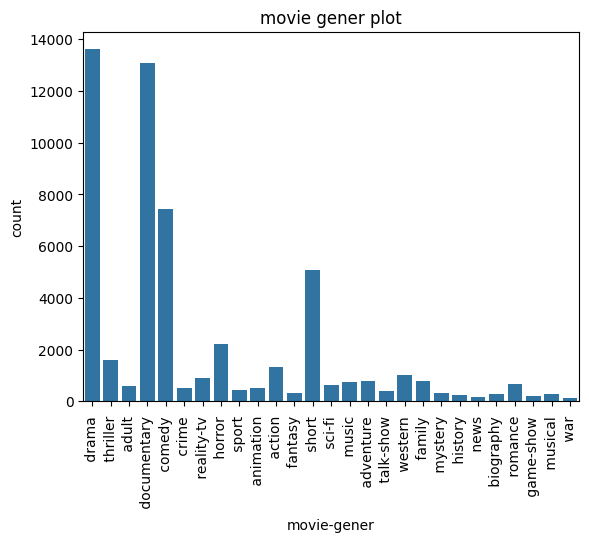

<Figure size 1500x1200 with 0 Axes>

In [10]:
#visualization
sns.countplot(x='gener',data=df)
plt.xlabel('movie-gener')
plt.ylabel('count')
plt.title('movie gener plot')
plt.xticks(rotation=90)
plt.figure(figsize=(15,12))

<Figure size 1600x1000 with 0 Axes>

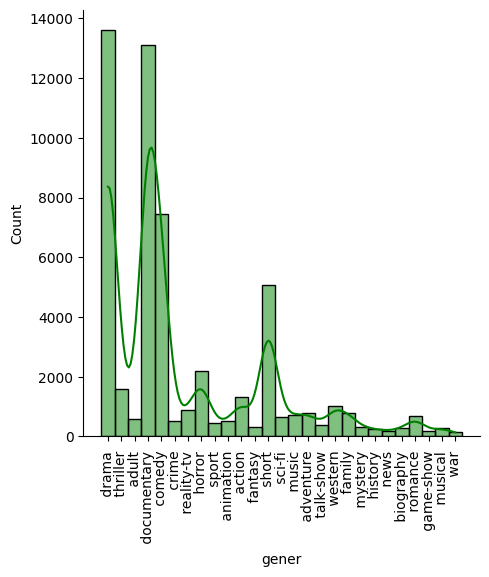

<Figure size 1600x1000 with 0 Axes>

In [11]:
sns.displot(df['gener'],kde=True,color='green')
plt.xticks(rotation=90)
plt.figure(figsize=(16,10))

<Figure size 1600x1200 with 0 Axes>

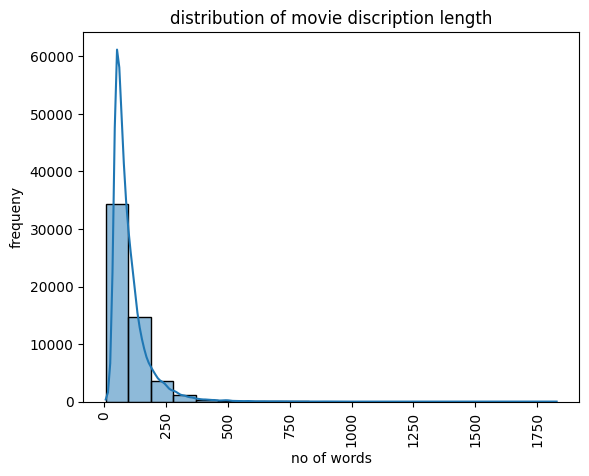

<Figure size 1600x1200 with 0 Axes>

In [12]:
sns.histplot(df['description_length'],kde=True,bins=20)
plt.title('distribution of movie discription length')
plt.xlabel('no of words')
plt.ylabel('frequeny')
plt.xticks(rotation=90)
plt.figure(figsize=(16,12))

<Figure size 1600x1000 with 0 Axes>

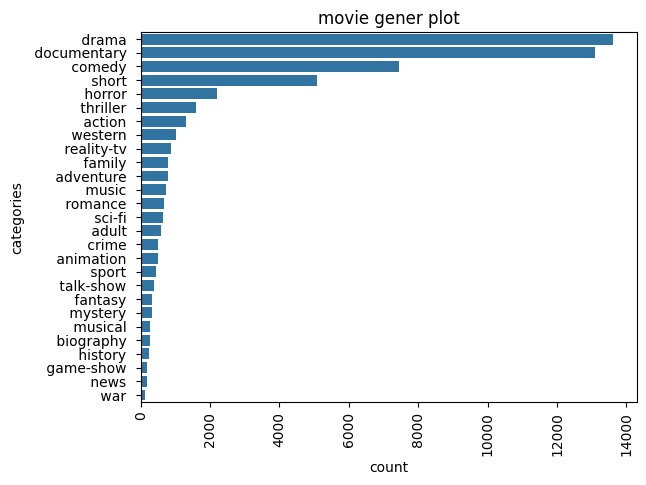

<Figure size 1600x1000 with 0 Axes>

In [13]:
x=df['gener'].value_counts()
sns.barplot(x=x,y=x.index,orient='h')
plt.xlabel('count')
plt.ylabel('categories')
plt.title('movie gener plot')
plt.xticks(rotation=90)
plt.figure(figsize=(16,10))

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['gener']=encoder.fit_transform(df['gener'].values)
df['movie_name']=encoder.fit_transform(df['movie_name'].values)

In [15]:
df.head()

,id,movie_name,gener,description,description_length
0,1,35179,8,Listening in to a conversation between his do...,92
1,2,15605,24,A brother and sister with a past incestuous r...,32
2,3,53763,1,As the bus empties the students for their fie...,114
3,4,48033,8,To help their unemployed father make ends mee...,192
4,5,48760,8,The film's title refers not only to the un-re...,106


In [16]:
df.duplicated().values.any()

False

In [17]:
#convert all description text into lower case
df['description']=df['description'].apply(lambda i :i.lower())
df.head()

,id,movie_name,gener,description,description_length
0,1,35179,8,listening in to a conversation between his do...,92
1,2,15605,24,a brother and sister with a past incestuous r...,32
2,3,53763,1,as the bus empties the students for their fie...,114
3,4,48033,8,to help their unemployed father make ends mee...,192
4,5,48760,8,the film's title refers not only to the un-re...,106


In [18]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [19]:
tweet=df['description']
tweet

,description
0,listening in to a conversation between his do...
1,a brother and sister with a past incestuous r...
2,as the bus empties the students for their fie...
3,to help their unemployed father make ends mee...
4,the film's title refers not only to the un-re...
...,...
54209,this short-lived nbc live sitcom centered on ...
54210,the next generation of exploitation. the sist...
54211,"ze bestaan echt, is a stand-up comedy about g..."
54212,walter and vivian live in the country and hav...


In [20]:
#tokenization:
from nltk.tokenize import TweetTokenizer
sc=TweetTokenizer()
tweet=tweet.apply(lambda i: sc.tokenize(i)).apply(lambda i:" ".join(i))
tweet

,description
0,listening in to a conversation between his doc...
1,a brother and sister with a past incestuous re...
2,as the bus empties the students for their fiel...
3,to help their unemployed father make ends meet...
4,the film's title refers not only to the un-rec...
...,...
54209,this short-lived nbc live sitcom centered on b...
54210,the next generation of exploitation . the sist...
54211,"ze bestaan echt , is a stand-up comedy about g..."
54212,walter and vivian live in the country and have...


In [21]:
#remove special characters using re
tweet=tweet.str.replace('[^a-zA-Z0-9]'," ",regex=True)
tweet

,description
0,listening in to a conversation between his doc...
1,a brother and sister with a past incestuous re...
2,as the bus empties the students for their fiel...
3,to help their unemployed father make ends meet...
4,the film s title refers not only to the un rec...
...,...
54209,this short lived nbc live sitcom centered on b...
54210,the next generation of exploitation the sist...
54211,ze bestaan echt is a stand up comedy about g...
54212,walter and vivian live in the country and have...


In [22]:
#take only more than 3 character for meaningful a word
from nltk.tokenize import TweetTokenizer
tweet=tweet.apply(lambda i :" ".join([w for w in sc.tokenize(i) if len(w)>=3]))
tweet

,description
0,listening conversation between his doctor and ...
1,brother and sister with past incestuous relati...
2,the bus empties the students for their field t...
3,help their unemployed father make ends meet ed...
4,the film title refers not only the recovered b...
...,...
54209,this short lived nbc live sitcom centered boni...
54210,the next generation exploitation the sisters k...
54211,bestaan echt stand comedy about growing and fa...
54212,walter and vivian live the country and have di...


In [23]:
#stemming
from nltk.stem import SnowballStemmer
ss=SnowballStemmer('english')
tweet=tweet.apply(lambda x:[ss.stem(i.lower()) for i in sc.tokenize(x)]).apply(lambda x:" ".join(x))
tweet

,description
0,listen convers between his doctor and parent y...
1,brother and sister with past incestu relations...
2,the bus empti the student for their field trip...
3,help their unemploy father make end meet edith...
4,the film titl refer not onli the recov bodi gr...
...,...
54209,this short live nbc live sitcom center bonino ...
54210,the next generat exploit the sister kapa bay s...
54211,bestaan echt stand comedi about grow and face ...
54212,walter and vivian live the countri and have di...


In [24]:
#remove stop words:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
stop=stopwords.words('english')
tweet=tweet.apply(lambda x:[i for i in sc.tokenize(x) if i not in stop]).apply(lambda x:" ".join(x))
tweet

,description
0,listen convers doctor parent year old oscar le...
1,brother sister past incestu relationship curre...
2,bus empti student field trip museum natur hist...
3,help unemploy father make end meet edith twin ...
4,film titl refer onli recov bodi ground zero al...
...,...
54209,short live nbc live sitcom center bonino world...
54210,next generat exploit sister kapa bay soror hou...
54211,bestaan echt stand comedi grow face fear freer...
54212,walter vivian live countri difficult time keep...


In [25]:
df.drop(columns=['id','movie_name'],inplace=True,axis=1)
df

,gener,description,description_length
0,8,listening in to a conversation between his do...,92
1,24,a brother and sister with a past incestuous r...,32
2,1,as the bus empties the students for their fie...,114
3,8,to help their unemployed father make ends mee...,192
4,8,the film's title refers not only to the un-re...,106
...,...,...,...
54209,5,this short-lived nbc live sitcom centered on ...,85
54210,13,the next generation of exploitation. the sist...,131
54211,7,"ze bestaan echt, is a stand-up comedy about g...",48
54212,5,walter and vivian live in the country and hav...,119


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
x=vector.fit_transform(tweet)
x

<54214x90053 sparse matrix of type '<class 'numpy.float64'>'
	with 2588895 stored elements in Compressed Sparse Row format>

In [27]:
y=df['gener'].values
y

array([ 8, 24,  1, ...,  7,  5, 12])

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [29]:
nave_model=MultinomialNB()
nave_model.fit(x_train,y_train)
y_pred=nave_model.predict(x_test)
y_pred

print("confusion matrix",confusion_matrix(y_test,y_pred))
print("classification report",classification_report(y_test,y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

confusion matrix [[   0    0    0    0    0    0    0   98  300    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    2    0   18  136    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    2    0   76  142    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0   74   72    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    1    0   63   23    0    0    0    0    0
     0    0    0    0    0    0    0    1    0    0    0    0    0]
 [   0    0    0    0    0   76    0  391 1748    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    1    0   17  146    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
